<a href="https://colab.research.google.com/github/leonorand/capsule_network/blob/master/NEU_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!mkdir DATASET
!pwd
!unzip "/content/drive/My Drive/Colab Notebooks/DATASETZIP/NEU surface defect database.zip" -d "/content/DATASET"

mkdir: cannot create directory ‘DATASET’: File exists
/content
Archive:  /content/drive/My Drive/Colab Notebooks/DATASETZIP/NEU surface defect database.zip
replace /content/DATASET/NEU surface defect database/0-RS_1.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/DATASET/NEU surface defect database/0-RS_1.bmp  
replace /content/DATASET/NEU surface defect database/0-RS_10.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/DATASET/NEU surface defect database/0-RS_10.bmp  
replace /content/DATASET/NEU surface defect database/0-RS_100.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/DATASET/NEU surface defect database/0-RS_100.bmp  
replace /content/DATASET/NEU surface defect database/0-RS_101.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
!free -m
!echo 1 > /proc/sys/vm/drop_caches
!echo 2 > /proc/sys/vm/drop_caches 
!echo 3 > /proc/sys/vm/drop_caches
!free -m

              total        used        free      shared  buff/cache   available
Mem:          13022         568       10124           0        2329       12172
Swap:             0           0           0
/bin/bash: /proc/sys/vm/drop_caches: Read-only file system
/bin/bash: /proc/sys/vm/drop_caches: Read-only file system
/bin/bash: /proc/sys/vm/drop_caches: Read-only file system
              total        used        free      shared  buff/cache   available
Mem:          13022         567       10125           0        2329       12175
Swap:             0           0           0


In [6]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [7]:
!/opt/bin/nvidia-smi

Mon Sep 23 07:12:41 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    72W / 149W |     69MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 20 11:00:07 2019

@author: leonorand
"""
print("-----------start-----------")
import os
from keras.layers import *
from keras.models import Sequential
from PIL import Image
import numpy as np
from keras import utils as np_utils
def load_data():
    data = np.empty((1800,200,200,1),dtype="float32")     
    #我们输入的训练数据是1800个200×200×3的图片
    label = np.empty((1800),dtype="uint8")        
    #1028维的标签，对应一个0~5的整数
    imgs = os.listdir("/content/DATASET/NEU surface defect database/")          
    #os.listdir()可以读取当前文件夹目录下所有文件的名字，放到一个list中
    #del imgs[0]                         
    #注意，在mac下读取时第一个文件名是'.DS_Store',将其删除
    num = len(imgs)              
    for i in range(num): #一共1800张图，注意range函数从0开始
        img = Image.open("/content/DATASET/NEU surface defect database/" + imgs[i])      #Image.open()读取图片，使用PIL下的Image
        arr = np.asarray(img,dtype="float32")   #将图片转化为一个200×200的张量   
        data[i,:,:,:] = arr.reshape(200,200,1)                      #张量赋值给data[i]
        #label[i] = int((imgs[i].split('.')[0]).split('_')[1])  
        
        #"11027_07.wav.bmp"这是图片名称的格式，从中读取标
        #imgs[i].split('.')[0]
        
        label[i] = int((imgs[i].split('.')[0]).split('-')[0]) 
        
#        print((imgs[i]),'=====>',label[i],'=====',i)
        
        #new_name = "./NEU surface defect database/dataset" + "1-" +img
        #print(new_name[i])
        
        #os.rename(img, new_name) 签07
        #将名称用‘.’分割成一个list，取第一个，然后再用‘_’分割取第二个，转化为整数作为标签
    return data,label

"""
up_dir = "NEU surface defect database/"

files_list = os.listdir(up_dir)                     # os.listdir函数返回一个存放该路径下文件名的列表
#imgs = os.listdir("./NEU surface defect database")  
for index, name in enumerate(files_list):           # 遍历文件名列表，enumerate函数放回元素值和对应索引
    old_name = up_dir + name                        # 原来的文件名
    aaa = (files_list[index].split('.')[0]).split('_')[0]
    print("aaa:",aaa)
    if aaa == "RS":
          new_name = up_dir  + "0-" +name
    elif aaa == "Pa":
          new_name = up_dir  + "1-" +name
    elif aaa == "Cr":
          new_name = up_dir  + "2-" +name
    elif aaa == "PS":
          new_name = up_dir  + "3-" +name
    elif aaa == "In":
          new_name = up_dir  + "4-" +name
    else:
          new_name = up_dir  + "5-" +name
#    new_name = up_dir  + "1-" +name       # 对新文件名进行定义，这里可以根据自己的需要来定义
    os.rename(old_name, new_name)  

"""

data, label = load_data()   #当别的模型需要使用load_data()函数时，直接import的就行

print("-----------end----------",data[1799], label[1799])

label = np_utils.to_categorical(label, 6)

print("-----------end----------",data[1799], label[1799])
#label为0~5共6个类别，keras要求格式为binary class matrices,转化一下，直接调用keras提供的这个函数
#此时的label是1028×24维的，数字0对应[1，0，0，0，0,0]

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
#用到sklearn里面的一个库
x_train,x_test,y_train,y_test=train_test_split(data,label,random_state=0,test_size=0.1)
#x对应图片矩阵，y对应label，test集合占10%

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


print("-----------end----------",x_train[0], x_test[0],y_train[0],y_test[0])

"""
model = Sequential()#生成一个model，后面的操作都是在此model的基础上
model.add(Convolution2D(4 ,5, 5, border_mode='valid' ,input_shape=(200,200))) 
#4个卷积核，每个卷积核大小5*5。得到196×196。valid表示只卷积矩阵内部，图像会缩小
#与tensorflow不同的是，我们不需要显式的表示输入的通道数
model.add(Activation('tanh'))     #激活函数
model.add(MaxPooling2D(pool_size=(2, 2)))#池化操作，得到98×98
model.add(Convolution2D(8, 5, 5, border_mode='valid')) 
#8个卷积核，每个卷积核大小5*5。得到94×94
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))#池化操作，得到47×47
model.add(Convolution2D(16, 4, 4, border_mode='valid')) 
#16个卷积核，每个卷积核大小3*3。得到44×44
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))#池化操作，得到22×22
model.add(Convolution2D(16, 3, 3, border_mode='valid')) 
#16个卷积核，每个卷积核大小3*3。得到20×20
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))#池化操作，得到10×10
model.add(Convolution2D(32, 3, 3, border_mode='valid'))
 #16个卷积核，每个卷积核大小3*3。得到8×8
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))#池化操作，得到4×4
model.add(Flatten())              #压扁平准备全连接
model.add(Dense(512))             #标准一维全连接层。
model.add(Activation('tanh'))
#你还可以在model.add(Activation('tanh'))后加上dropout的技巧: model.add(Dropout(0.5))
model.add(Dense(6, init='normal'))         #最后全连接到24个节点上
model.add(Activation('softmax'))            #Softmax分类，输出是24类别


sgd = SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#交叉熵作为损失函数，SGD作为优化器，计算准确度

model.fit(x_train, y_train , batch_size=50 ,nb_epoch=10 , shuffle=True, verbose=1,validation_data=(x_test, y_test))
#训练的epoch数设为10，即训练10轮，batch_size为50每轮中每次训练用50个数据
#数据经过随机打乱shuffle=True。verbose=1，训练过程中输出的信息，0、1、2三种方式都可以，无关紧要。训练时每一个epoch都输出accuracy。

model.evaluate(x_test, y_test)#对另外的测试数据进行测试，输出loss和accuracy

"""







-----------start-----------


Using TensorFlow backend.


('-----------end----------', array([[[ 89.],
        [ 94.],
        [ 97.],
        ...,
        [237.],
        [221.],
        [225.]],

       [[ 95.],
        [ 97.],
        [103.],
        ...,
        [229.],
        [217.],
        [208.]],

       [[108.],
        [107.],
        [124.],
        ...,
        [215.],
        [212.],
        [230.]],

       ...,

       [[103.],
        [ 91.],
        [ 92.],
        ...,
        [255.],
        [255.],
        [255.]],

       [[ 93.],
        [ 99.],
        [ 93.],
        ...,
        [255.],
        [255.],
        [254.]],

       [[101.],
        [103.],
        [ 93.],
        ...,
        [255.],
        [255.],
        [255.]]], dtype=float32), 1)
('-----------end----------', array([[[ 89.],
        [ 94.],
        [ 97.],
        ...,
        [237.],
        [221.],
        [225.]],

       [[ 95.],
        [ 97.],
        [103.],
        ...,
        [229.],
        [217.],
        [208.]],

       [[108.],
      

"\nmodel = Sequential()#\xe7\x94\x9f\xe6\x88\x90\xe4\xb8\x80\xe4\xb8\xaamodel\xef\xbc\x8c\xe5\x90\x8e\xe9\x9d\xa2\xe7\x9a\x84\xe6\x93\x8d\xe4\xbd\x9c\xe9\x83\xbd\xe6\x98\xaf\xe5\x9c\xa8\xe6\xad\xa4model\xe7\x9a\x84\xe5\x9f\xba\xe7\xa1\x80\xe4\xb8\x8a\nmodel.add(Convolution2D(4 ,5, 5, border_mode='valid' ,input_shape=(200,200))) \n#4\xe4\xb8\xaa\xe5\x8d\xb7\xe7\xa7\xaf\xe6\xa0\xb8\xef\xbc\x8c\xe6\xaf\x8f\xe4\xb8\xaa\xe5\x8d\xb7\xe7\xa7\xaf\xe6\xa0\xb8\xe5\xa4\xa7\xe5\xb0\x8f5*5\xe3\x80\x82\xe5\xbe\x97\xe5\x88\xb0196\xc3\x97196\xe3\x80\x82valid\xe8\xa1\xa8\xe7\xa4\xba\xe5\x8f\xaa\xe5\x8d\xb7\xe7\xa7\xaf\xe7\x9f\xa9\xe9\x98\xb5\xe5\x86\x85\xe9\x83\xa8\xef\xbc\x8c\xe5\x9b\xbe\xe5\x83\x8f\xe4\xbc\x9a\xe7\xbc\xa9\xe5\xb0\x8f\n#\xe4\xb8\x8etensorflow\xe4\xb8\x8d\xe5\x90\x8c\xe7\x9a\x84\xe6\x98\xaf\xef\xbc\x8c\xe6\x88\x91\xe4\xbb\xac\xe4\xb8\x8d\xe9\x9c\x80\xe8\xa6\x81\xe6\x98\xbe\xe5\xbc\x8f\xe7\x9a\x84\xe8\xa1\xa8\xe7\xa4\xba\xe8\xbe\x93\xe5\x85\xa5\xe7\x9a\x84\xe9\x80\x9a\xe9\x81\x93\xe6\x9

W0923 07:12:46.314336 140534572976000 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0923 07:12:46.320110 140534572976000 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0923 07:12:46.329818 140534572976000 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0923 07:12:46.361407 140534572976000 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0923 07:12:46.416954 140534572976000 deprecation_wrapp

train data type:<type 'numpy.ndarray'>, shape:(1620, 200, 200, 1), dim:4


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 141376)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               14137700  
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 606       
Total para

W0923 07:12:46.570569 140534572976000 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_grad.py:1250: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0923 07:12:46.641535 140534572976000 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 1620 samples, validate on 180 samples
Epoch 1/100
1620/1620 [==============================] - 12s 7ms/step - loss: 1.7772 - acc: 0.1741 - val_loss: 1.7552 - val_acc: 0.1944
Epoch 2/100
1620/1620 [==============================] - 3s 2ms/step - loss: 1.7614 - acc: 0.2031 - val_loss: 1.7377 - val_acc: 0.1833
Epoch 3/100
1620/1620 [==============================] - 3s 2ms/step - loss: 1.7448 - acc: 0.2123 - val_loss: 1.7345 - val_acc: 0.2278
Epoch 4/100
1620/1620 [==============================] - 3s 2ms/step - loss: 1.7217 - acc: 0.2395 - val_loss: 1.6976 - val_acc: 0.2611
Epoch 5/100
1620/1620 [==============================] - 3s 2ms/step - loss: 1.6910 - acc: 0.2710 - val_loss: 1.6661 - val_acc: 0.2556
Epoch 6/100
1620/1620 [==============================] - 3s 2ms/step - loss: 1.6545 - acc: 0.3074 - val_loss: 1.6354 - val_acc: 0.3167
Epoch 7/100
1620/1620 [==============================] - 3s 2ms/step - loss: 1.6336 - acc: 0.3420 - val_loss: 1.6047 - val_acc: 0.3111
Epoch 8

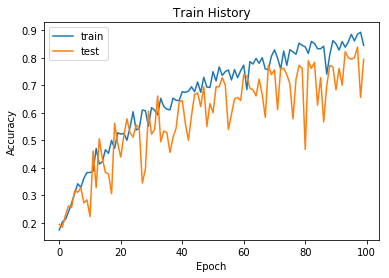

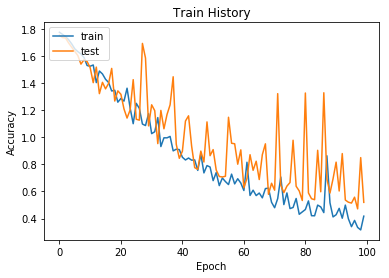

In [9]:
#LeNet
model = Sequential()  
print("train data type:{}, shape:{}, dim:{}".format(type(x_train), x_train.shape, x_train.ndim))
model.add(Conv2D(32,(5,5),strides=(1,1),input_shape=(200,200,1),padding='valid',activation='relu',kernel_initializer='uniform'))  
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Conv2D(64,(5,5),strides=(1,1),padding='valid',activation='relu',kernel_initializer='uniform'))  
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Flatten())  
model.add(Dense(100,activation='relu'))  
model.add(Dense(6,activation='softmax'))  
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])  
model.summary()  
  

#x_train,x_test,y_train,y_test
train_history = model.fit(x_train, y_train , batch_size=128 ,nb_epoch=100 , shuffle=True, verbose=1,validation_data=(x_test, y_test))  
#[0.031825309940411217, 0.98979999780654904]  
#print model.evaluate(test_x,test_y,batch_size=20,verbose=2)



from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

###测试集输出结果可视化

import tensorflow as tf
from __future__ import print_function
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('1.png')
    plt.show()
#准确率预测
show_train_history('acc','val_acc')
#损失函数预测
show_train_history('loss','val_loss')

W0923 07:18:32.855336 140534572976000 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 96)        11712     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 384)       885120    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 384)       1327488   
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 256)       884992    
__________

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:21: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1620 samples, validate on 180 samples
Epoch 1/300
1620/1620 [==============================] - 12s 7ms/step - loss: 1.8216 - acc: 0.1833 - val_loss: 1.7464 - val_acc: 0.2167
Epoch 2/300
1620/1620 [==============================] - 2s 1ms/step - loss: 1.7844 - acc: 0.1889 - val_loss: 1.7472 - val_acc: 0.2778
Epoch 3/300
1620/1620 [==============================] - 2s 1ms/step - loss: 1.7663 - acc: 0.2210 - val_loss: 1.7366 - val_acc: 0.2167
Epoch 4/300
1620/1620 [==============================] - 2s 1ms/step - loss: 1.7581 - acc: 0.2043 - val_loss: 1.7292 - val_acc: 0.2389
Epoch 5/300
1620/1620 [==============================] - 2s 1ms/step - loss: 1.7359 - acc: 0.2383 - val_loss: 1.7073 - val_acc: 0.2556
Epoch 6/300
1620/1620 [==============================] - 2s 1ms/step - loss: 1.7353 - acc: 0.2432 - val_loss: 1.7425 - val_acc: 0.1222
Epoch 7/300
1620/1620 [==============================] - 2s 1ms/step - loss: 1.7227 - acc: 0.2395 - val_loss: 1.7430 - val_acc: 0.1222
Epoch 8

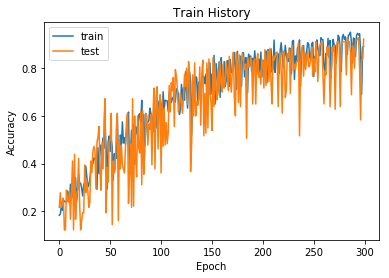

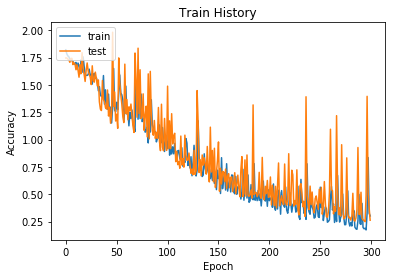

In [10]:
#Alex
model = Sequential()
model.add(Conv2D(96,(11,11),strides=(4,4),input_shape=(200,200,1),padding='valid',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6,activation='softmax'))

model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])  
model.summary()  
  
train_history = model.fit(x_train, y_train , batch_size=512 ,nb_epoch=300 , shuffle=True, verbose=1,validation_data=(x_test, y_test))  


from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

###测试集输出结果可视化

import tensorflow as tf
from __future__ import print_function
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('1.png')
    plt.show()
#准确率预测
show_train_history('acc','val_acc')
#损失函数预测
show_train_history('loss','val_loss')



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 97, 97, 96)        4800      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 48, 96)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 256)       614656    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 384)       885120    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 384)       1327488   
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 256)       884992    
__________

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1620 samples, validate on 180 samples
Epoch 1/300
1620/1620 [==============================] - 8s 5ms/step - loss: 1.7809 - acc: 0.1784 - val_loss: 1.7542 - val_acc: 0.1389
Epoch 2/300
1620/1620 [==============================] - 5s 3ms/step - loss: 1.7529 - acc: 0.2056 - val_loss: 1.7262 - val_acc: 0.2778
Epoch 3/300
1620/1620 [==============================] - 5s 3ms/step - loss: 1.7329 - acc: 0.2265 - val_loss: 1.7057 - val_acc: 0.2722
Epoch 4/300
1620/1620 [==============================] - 5s 3ms/step - loss: 1.7029 - acc: 0.2759 - val_loss: 1.6694 - val_acc: 0.2889
Epoch 5/300
1620/1620 [==============================] - 5s 3ms/step - loss: 1.6796 - acc: 0.2957 - val_loss: 1.6367 - val_acc: 0.2722
Epoch 6/300
1620/1620 [==============================] - 5s 3ms/step - loss: 1.6613 - acc: 0.2957 - val_loss: 1.6337 - val_acc: 0.1556
Epoch 7/300
1620/1620 [==============================] - 5s 3ms/step - loss: 1.6334 - acc: 0.3302 - val_loss: 1.5556 - val_acc: 0.2778
Epoch 8/

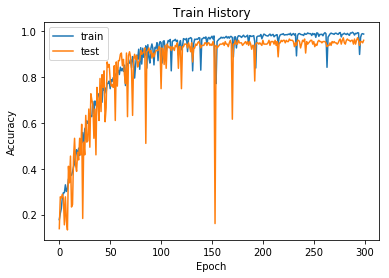

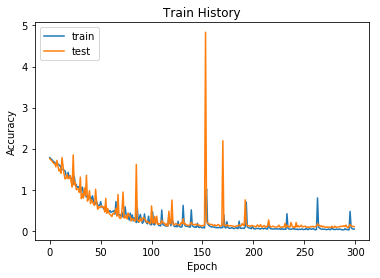

In [11]:
#ZF-Net网络-8
model = Sequential()  
model.add(Conv2D(96,(7,7),strides=(2,2),input_shape=(200,200,1),padding='valid',activation='relu',kernel_initializer='uniform'))  
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))  
model.add(Conv2D(256,(5,5),strides=(2,2),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))  
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))  
model.add(Flatten())  
model.add(Dense(4096,activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(4096,activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(6,activation='softmax'))

model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])  
model.summary()  
  
train_history = model.fit(x_train, y_train , batch_size=128 ,nb_epoch=300 , shuffle=True, verbose=1,validation_data=(x_test, y_test))  


from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

###测试集输出结果可视化

import tensorflow as tf
from __future__ import print_function
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('1.png')
    plt.show()
#准确率预测
show_train_history('acc','val_acc')
#损失函数预测
show_train_history('loss','val_loss')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 200, 200, 64)      640       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 200, 200, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 100, 100, 128)     49280     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 100, 100, 128)     147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 50, 50, 256)       295168    
__________

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:38: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1620 samples, validate on 180 samples
Epoch 1/50
1620/1620 [==============================] - 60s 37ms/step - loss: 1.7879 - acc: 0.1728 - val_loss: 1.7982 - val_acc: 0.1222
Epoch 2/50
1620/1620 [==============================] - 39s 24ms/step - loss: 1.7754 - acc: 0.1802 - val_loss: 1.7527 - val_acc: 0.2389
Epoch 3/50
1620/1620 [==============================] - 39s 24ms/step - loss: 1.7353 - acc: 0.2488 - val_loss: 1.7352 - val_acc: 0.2833
Epoch 4/50
1620/1620 [==============================] - 39s 24ms/step - loss: 1.7222 - acc: 0.2358 - val_loss: 1.6291 - val_acc: 0.2444
Epoch 5/50
1620/1620 [==============================] - 39s 24ms/step - loss: 1.7023 - acc: 0.2790 - val_loss: 1.6719 - val_acc: 0.1778
Epoch 6/50
1620/1620 [==============================] - 39s 24ms/step - loss: 1.6309 - acc: 0.3068 - val_loss: 1.5036 - val_acc: 0.2722
Epoch 7/50
1620/1620 [==============================] - 39s 24ms/step - loss: 1.5601 - acc: 0.3556 - val_loss: 1.5379 - val_acc: 0.3333
E

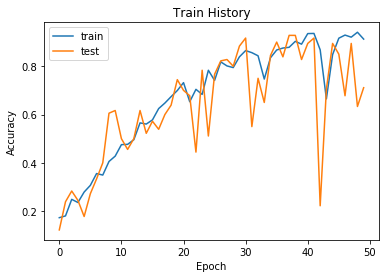

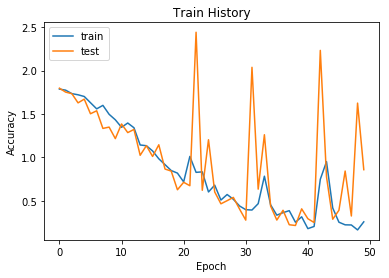

In [12]:
#VGG 16
model = Sequential()
    
model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=(200,200,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Conv2D(128,(3,2),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6,activation='softmax'))


model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])  
model.summary()  
  
train_history = model.fit(x_train, y_train , batch_size=64 ,nb_epoch=50 , shuffle=True, verbose=1,validation_data=(x_test, y_test))  


from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

###测试集输出结果可视化

import tensorflow as tf
from __future__ import print_function
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('1.png')
    plt.show()
#准确率预测
show_train_history('acc','val_acc')
#损失函数预测
show_train_history('loss','val_loss')


In [13]:
#goolenet v4
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.models import Model
from keras.utils import plot_model
 
 
CONV_BLOCK_COUNT = 0  # 用来命名计数卷积编号
INCEPTION_A_COUNT = 0
INCEPTION_B_COUNT = 0
INCEPTION_C_COUNT = 0
 
 
def conv_block(x, nb_filters, nb_row, nb_col, strides=(1, 1), padding='same', use_bias=False):
    global CONV_BLOCK_COUNT
    CONV_BLOCK_COUNT += 1
    with K.name_scope('conv_block_'+str(CONV_BLOCK_COUNT)):
        x = Conv2D(filters=nb_filters,
                   kernel_size=(nb_row, nb_col),
                   strides=strides,
                   padding=padding,
                   use_bias=use_bias)(x)
        x = BatchNormalization(axis=-1, momentum=0.9997, scale=False)(x)
        x = Activation("relu")(x)
    return x
 
 
def stem(x_input):
    with K.name_scope('stem'):
        x = conv_block(x_input, 32, 3, 3, strides=(2, 2), padding='valid')
        x = conv_block(x, 32, 3, 3, padding='valid')
        x = conv_block(x, 64, 3, 3)
 
        x1 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)
        x2 = conv_block(x, 96, 3, 3, strides=(2, 2), padding='valid')
 
        x = concatenate([x1, x2], axis=-1)
 
        x1 = conv_block(x, 64, 1, 1)
        x1 = conv_block(x1, 96, 3, 3, padding='valid')
 
        x2 = conv_block(x, 64, 1, 1)
        x2 = conv_block(x2, 64, 7, 1)
        x2 = conv_block(x2, 64, 1, 7)
        x2 = conv_block(x2, 96, 3, 3, padding='valid')
 
        x = concatenate([x1, x2], axis=-1)
 
        x1 = conv_block(x, 192, 3, 3, strides=(2, 2), padding='valid')
        x2 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x)
 
        merged_vector = concatenate([x1, x2], axis=-1)
    return merged_vector
 
 
def inception_A(x_input):
    """35*35 卷积块"""
    global INCEPTION_A_COUNT
    INCEPTION_A_COUNT += 1
    with K.name_scope('inception_A' + str(INCEPTION_A_COUNT)):
        averagepooling_conv1x1 = AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x_input)  # 35 * 35 * 192
        averagepooling_conv1x1 = conv_block(averagepooling_conv1x1, 96, 1, 1)  # 35 * 35 * 96
 
        conv1x1 = conv_block(x_input, 96, 1, 1)  # 35 * 35 * 96
 
        conv1x1_3x3 = conv_block(x_input, 64, 1, 1)  # 35 * 35 * 64
        conv1x1_3x3 = conv_block(conv1x1_3x3, 96, 3, 3)  # 35 * 35 * 96
 
        conv3x3_3x3 = conv_block(x_input, 64, 1, 1)  # 35 * 35 * 64
        conv3x3_3x3 = conv_block(conv3x3_3x3, 96, 3, 3)  # 35 * 35 * 96
        conv3x3_3x3 = conv_block(conv3x3_3x3, 96, 3, 3)  # 35 * 35 * 96
 
        merged_vector = concatenate([averagepooling_conv1x1, conv1x1, conv1x1_3x3, conv3x3_3x3], axis=-1)  # 35 * 35 * 384
    return merged_vector
 
 
def inception_B(x_input):
    """17*17 卷积块"""
    global INCEPTION_B_COUNT
    INCEPTION_B_COUNT += 1
    with K.name_scope('inception_B' + str(INCEPTION_B_COUNT)):
        averagepooling_conv1x1 = AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x_input)
        averagepooling_conv1x1 = conv_block(averagepooling_conv1x1, 128, 1, 1)
 
        conv1x1 = conv_block(x_input, 384, 1, 1)
 
        conv1x7_1x7 = conv_block(x_input, 192, 1, 1)
        conv1x7_1x7 = conv_block(conv1x7_1x7, 224, 1, 7)
        conv1x7_1x7 = conv_block(conv1x7_1x7, 256, 1, 7)
 
        conv2_1x7_7x1 = conv_block(x_input, 192, 1, 1)
        conv2_1x7_7x1 = conv_block(conv2_1x7_7x1, 192, 1, 7)
        conv2_1x7_7x1 = conv_block(conv2_1x7_7x1, 224, 7, 1)
        conv2_1x7_7x1 = conv_block(conv2_1x7_7x1, 224, 1, 7)
        conv2_1x7_7x1 = conv_block(conv2_1x7_7x1, 256, 7, 1)
 
        merged_vector = concatenate([averagepooling_conv1x1, conv1x1, conv1x7_1x7, conv2_1x7_7x1], axis=-1)
    return merged_vector
 
 
def inception_C(x_input):
    """8*8 卷积块"""
    global INCEPTION_C_COUNT
    INCEPTION_C_COUNT += 1
    with K.name_scope('Inception_C' + str(INCEPTION_C_COUNT)):
        averagepooling_conv1x1 = AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x_input)
        averagepooling_conv1x1 = conv_block(averagepooling_conv1x1, 256, 1, 1)
 
        conv1x1 = conv_block(x_input, 256, 1, 1)
 
        # 用 1x3 和 3x1 替代 3x3
        conv3x3_1x1 = conv_block(x_input, 384, 1, 1)
        conv3x3_1 = conv_block(conv3x3_1x1, 256, 1, 3)
        conv3x3_2 = conv_block(conv3x3_1x1, 256, 3, 1)
 
        conv2_3x3_1x1 = conv_block(x_input, 384, 1, 1)
        conv2_3x3_1x1 = conv_block(conv2_3x3_1x1, 448, 1, 3)
        conv2_3x3_1x1 = conv_block(conv2_3x3_1x1, 512, 3, 1)
        conv2_3x3_1x1_1 = conv_block(conv2_3x3_1x1, 256, 3, 1)
        conv2_3x3_1x1_2 = conv_block(conv2_3x3_1x1, 256, 1, 3)
 
        merged_vector = concatenate([averagepooling_conv1x1, conv1x1, conv3x3_1, conv3x3_2, conv2_3x3_1x1_1, conv2_3x3_1x1_2], axis=-1)
    return merged_vector
 
 
def reduction_A(x_input, k=192, l=224, m=256, n=384):
    with K.name_scope('Reduction_A'):
        """Architecture of a 35 * 35 to 17 * 17 Reduction_A block."""
        maxpool = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x_input)
 
        conv3x3 = conv_block(x_input, n, 3, 3, strides=(2, 2), padding='valid')
 
        conv2_3x3 = conv_block(x_input, k, 1, 1)
        conv2_3x3 = conv_block(conv2_3x3, l, 3, 3)
        conv2_3x3 = conv_block(conv2_3x3, m, 3, 3, strides=(2, 2), padding='valid')
 
        merged_vector = concatenate([maxpool, conv3x3, conv2_3x3], axis=-1)
    return merged_vector
 
 
def reduction_B(x_input):
    """Architecture of a 17 * 17 to 8 * 8 Reduction_B block."""
    with K.name_scope('Reduction_B'):
        maxpool = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')(x_input)
 
        conv3x3 = conv_block(x_input, 192, 1, 1)
        conv3x3 = conv_block(conv3x3, 192, 3, 3, strides=(2, 2), padding='valid')
 
        conv1x7_7x1_3x3 = conv_block(x_input, 256, 1, 1)
        conv1x7_7x1_3x3 = conv_block(conv1x7_7x1_3x3, 256, 1, 7)
        conv1x7_7x1_3x3 = conv_block(conv1x7_7x1_3x3, 320, 7, 1)
        conv1x7_7x1_3x3 = conv_block(conv1x7_7x1_3x3, 320, 3, 3, strides=(2, 2), padding='valid')
 
        merged_vector = concatenate([maxpool, conv3x3, conv1x7_7x1_3x3], axis=-1)
    return merged_vector
 
 
def inception_v4_backbone(nb_classes=1000, load_weights=True):
    x_input = Input(shape=(299, 299, 3))
    # Stem
    x = stem(x_input)  # 35 x 35 x 384
    # 4 x Inception_A
    for i in range(4):
        x = inception_A(x)  # 35 x 35 x 384
    # Reduction_A
    x = reduction_A(x, k=192, l=224, m=256, n=384)  # 17 x 17 x 1024
    # 7 x Inception_B
    for i in range(7):
        x = inception_B(x)  # 17 x 17 x1024
    # Reduction_B
    x = reduction_B(x)  # 8 x 8 x 1536
    # Average Pooling
    x = AveragePooling2D(pool_size=(8, 8))(x)  # 1536
    # dropout
    x = Dropout(0.2)(x)
    x = Flatten()(x)  # 1536
    # 全连接层
    x = Dense(units=nb_classes, activation='softmax')(x)
    model = Model(inputs=x_input, outputs=x, name='Inception-V4')
    return model
 
 
if __name__ == '__main__':
    inception_v4 = inception_v4_backbone()
    plot_model(inception_v4, 'inception_v4.png', show_shapes=True)
 


W0923 08:26:14.007388 140534572976000 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0923 08:26:14.943802 140534572976000 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



In [0]:
from keras import backend as K


class Lookahead(object):
    """Add the [Lookahead Optimizer](https://arxiv.org/abs/1907.08610) functionality for [keras](https://keras.io/).
    """

    def __init__(self, k=5, alpha=0.5):
        self.k = k
        self.alpha = alpha
        self.count = 0

    def inject(self, model):
        """Inject the Lookahead algorithm for the given model.
        The following code is modified from keras's _make_train_function method.
        See: https://github.com/keras-team/keras/blob/master/keras/engine/training.py#L497
        """
        if not hasattr(model, 'train_function'):
            raise RuntimeError('You must compile your model before using it.')

        model._check_trainable_weights_consistency()

        if model.train_function is None:
            inputs = (model._feed_inputs +
                      model._feed_targets +
                      model._feed_sample_weights)
            if model._uses_dynamic_learning_phase():
                inputs += [K.learning_phase()]
            fast_params = model._collected_trainable_weights

            with K.name_scope('training'):
                with K.name_scope(model.optimizer.__class__.__name__):
                    training_updates = model.optimizer.get_updates(
                        params=fast_params,
                        loss=model.total_loss)
                    slow_params = [K.variable(p) for p in fast_params]
                fast_updates = (model.updates +
                                training_updates +
                                model.metrics_updates)

                slow_updates, copy_updates = [], []
                for p, q in zip(fast_params, slow_params):
                    slow_updates.append(K.update(q, q + self.alpha * (p - q)))
                    copy_updates.append(K.update(p, q))

                # Gets loss and metrics. Updates weights at each call.
                fast_train_function = K.function(
                    inputs,
                    [model.total_loss] + model.metrics_tensors,
                    updates=fast_updates,
                    name='fast_train_function',
                    **model._function_kwargs)

                def F(inputs):
                    self.count += 1
                    R = fast_train_function(inputs)
                    if self.count % self.k == 0:
                        K.batch_get_value(slow_updates)
                        K.batch_get_value(copy_updates)
                    return R
                
                model.train_function = F


In [0]:
#capsule
#!pip install keras ==2.2.4
from keras import activations
from keras import backend as K
from keras.engine.topology import Layer
 
def squash(x, axis=-1):
    s_squared_norm = K.sum(K.square(x), axis, keepdims=True) + K.epsilon()
    scale = K.sqrt(s_squared_norm)/ (0.5 + s_squared_norm)
    return scale * x
 
 
#define our own softmax function instead of K.softmax
def softmax(x, axis=-1):
    ex = K.exp(x - K.max(x, axis=axis, keepdims=True))
    return ex/K.sum(ex, axis=axis, keepdims=True)
 
 
#A Capsule Implement with Pure Keras
class Capsule(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, share_weights=True, activation='squash', **kwargs):
        super(Capsule, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings
        self.share_weights = share_weights
        if activation == 'squash':
            self.activation = squash
        else:
            self.activation = activations.get(activation)
 
    def build(self, input_shape):
        super(Capsule, self).build(input_shape)
        input_dim_capsule = input_shape[-1]
        if self.share_weights:
            self.W = self.add_weight(name='capsule_kernel',
                                     shape=(1, input_dim_capsule,
                                            self.num_capsule * self.dim_capsule),
                                     initializer='glorot_uniform',
                                     trainable=True)
        else:
            input_num_capsule = input_shape[-2]
            self.W = self.add_weight(name='capsule_kernel',
                                     shape=(input_num_capsule,
                                            input_dim_capsule,
                                            self.num_capsule * self.dim_capsule),
                                     initializer='glorot_uniform',
                                     trainable=True)
 
    def call(self, u_vecs):
        if self.share_weights:
            u_hat_vecs = K.conv1d(u_vecs, self.W)
        else:
            u_hat_vecs = K.local_conv1d(u_vecs, self.W, [1], [1])
 
        batch_size = K.shape(u_vecs)[0]
        input_num_capsule = K.shape(u_vecs)[1]
        u_hat_vecs = K.reshape(u_hat_vecs, (batch_size, input_num_capsule,
                                            self.num_capsule, self.dim_capsule))
        u_hat_vecs = K.permute_dimensions(u_hat_vecs, (0, 2, 1, 3))
        #final u_hat_vecs.shape = [None, num_capsule, input_num_capsule, dim_capsule]
 
        b = K.zeros_like(u_hat_vecs[:,:,:,0]) #shape = [None, num_capsule, input_num_capsule]
        for i in range(self.routings):
            c = softmax(b, 1)
            o = K.batch_dot(c, u_hat_vecs, [2, 2])
            if K.backend() == 'theano':
                o = K.sum(o, axis=1)
            if i < self.routings - 1:
                o = K.l2_normalize(o, -1)
                b = K.batch_dot(o, u_hat_vecs, [2, 3])
                if K.backend() == 'theano':
                    b = K.sum(b, axis=1)
 
        return self.activation(o)
 
    def compute_output_shape(self, input_shape):
        return (None, self.num_capsule, self.dim_capsule)


W0923 08:26:34.412744 140534572976000 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variables.py:2618: initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200, 200, 1)       0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 198, 198, 64)      640       
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 196, 196, 64)      36928     
_________________________________________________________________
average_pooling2d_13 (Averag (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 96, 96, 128)       73856     
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 94, 94, 128)       147584    
_________________________________________________________________
reshape_1 (Reshape)          (None, 8836, 128)         0         
__________

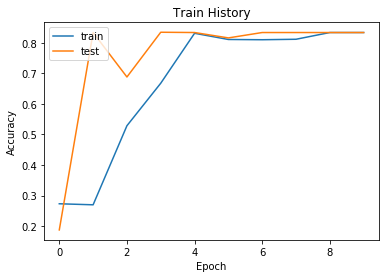

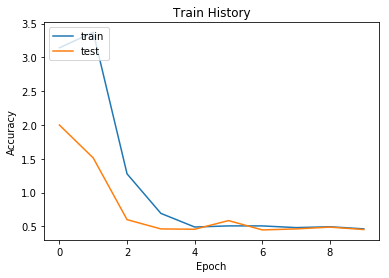

In [16]:
#! -*- coding: utf-8 -*-
 
#from Capsule_Keras import *
from keras import utils
from keras.models import Model
from keras.layers import *
from keras import backend as K

 
 

 
#搭建CNN+Capsule分类模型
## 一个常规的 Conv2D 模型
input_image = Input(shape=(200,200,1))
cnn = Conv2D(64, (3, 3), activation='relu')(input_image)
cnn = Conv2D(64, (3, 3), activation='relu')(cnn)
cnn = AveragePooling2D((2,2))(cnn)
cnn = Conv2D(128, (3, 3), activation='relu')(cnn)
cnn = Conv2D(128, (3, 3), activation='relu')(cnn)
 
cnn = Reshape((-1, 128))(cnn)
capsule = Capsule(6, 16, 3, True)(cnn)
output = Lambda(lambda x: K.sqrt(K.sum(K.square(x), 2)), output_shape=(6,))(capsule)
 
model = Model(inputs=input_image, outputs=output)
'''
model.compile(
    #loss=lambda y_true,y_pred: y_true*K.relu(0.9-y_pred)**2 + 0.25*(1-y_true)*K.relu(y_pred-0.1)**2,
    loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
'''

model.compile(optimizer='adam',
       loss='binary_crossentropy',
       metrics=['accuracy']) # 用你想用的优化器
lookahead = Lookahead(k=5, alpha=0.5) # 初始化Lookahead
lookahead.inject(model) # 插入到模型中
 
model.summary()
 
train_history = model.fit(x_train, y_train,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))
 


###测试集输出结果可视化

import tensorflow as tf
from __future__ import print_function
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('1.png')
    plt.show()
#准确率预测
show_train_history('acc','val_acc')
#损失函数预测
show_train_history('loss','val_loss')
